##### Here I am tyring out different ML models for regression and try to find the best model for deployment purpose.

In [107]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# importing dataset
df=pd.read_csv('data.csv')
df1=df.copy()

In [109]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [110]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [111]:
# Lower columns names and some basic replacements
df.columns=df.columns.str.lower().str.replace(' ','_')
# Similarly I am doing for values of string columns
str_col=list(df.dtypes[df.dtypes=='object'].index)
for i in str_col:
    df[i]=df[i].str.lower().str.replace(' ','_')

In [112]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [113]:
# Checking unique values in some important columns
print('Unique elements in Model are',df['make'].nunique())
print('Unique elements in Transmission are',df['transmission_type'].nunique())
print('Unique elements in Vehicle size are',df['vehicle_size'].nunique())
print('Unique elements in Market category are',df['market_category'].nunique())
print('Unique elements in engine_fuel_type are',df['engine_fuel_type'].nunique())
print('Unique elements in driven wheels are',df['driven_wheels'].nunique())

Unique elements in Model are 48
Unique elements in Transmission are 5
Unique elements in Vehicle size are 3
Unique elements in Market category are 71
Unique elements in engine_fuel_type are 10
Unique elements in driven wheels are 4


In [114]:
print('Unique elements in Transmission are',df['transmission_type'].unique())
print('Unique elements in Vehicle size are',df['vehicle_size'].unique())
print('Unique elements in number of doors are',df['number_of_doors'].unique())
print('Unique elements in driven wheels are',df['driven_wheels'].unique())

Unique elements in Transmission are ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Unique elements in Vehicle size are ['compact' 'midsize' 'large']
Unique elements in number of doors are [ 2.  4.  3. nan]
Unique elements in driven wheels are ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']


In [115]:
df['vehicle_size'].value_counts()

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [116]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [117]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [118]:
# Dropping rows where transmission type is unknown and direct_drive
values=['direct_drive','unknown']
df=df[df.transmission_type.isin(values)==False]

In [119]:
df['number_of_doors'].value_counts()

4.0    8292
2.0    3139
3.0     395
Name: number_of_doors, dtype: int64

In [120]:
df['driven_wheels'].value_counts()

front_wheel_drive    4740
rear_wheel_drive     3344
all_wheel_drive      2342
four_wheel_drive     1401
Name: driven_wheels, dtype: int64

In [121]:
# Making a subset of data by first dropping few features:
df_new=df[['year', 'engine_hp','engine_cylinders', 'transmission_type','number_of_doors', 'vehicle_size',
'highway_mpg', 'city_mpg', 'msrp']]

In [122]:
df_new.isnull().sum()

year                  0
engine_hp            25
engine_cylinders     20
transmission_type     0
number_of_doors       1
vehicle_size          0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [123]:
column_means = df_new.mean()
df_new = df_new.fillna(column_means)

C:\Users\aksha\AppData\Local\Temp/ipykernel_17216/3023039600.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = df_new.mean()


In [124]:
df_new.isnull().sum()

year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
number_of_doors      0
vehicle_size         0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [125]:
df_new.head()

,year,engine_hp,engine_cylinders,transmission_type,number_of_doors,vehicle_size,highway_mpg,city_mpg,msrp
0,2011,335.0,6.0,manual,2.0,compact,26,19,46135
1,2011,300.0,6.0,manual,2.0,compact,28,19,40650
2,2011,300.0,6.0,manual,2.0,compact,28,20,36350
3,2011,230.0,6.0,manual,2.0,compact,28,18,29450
4,2011,230.0,6.0,manual,2.0,compact,28,18,34500


In [126]:
# Adding a new column named ageof car
# checking max year to subtract from that and form new age feature
m=df_new.year.max()
df_new['age']=m-df_new['year']
df_new.drop(['year'],axis=1,inplace=True)

In [127]:
df_new.head()

,engine_hp,engine_cylinders,transmission_type,number_of_doors,vehicle_size,highway_mpg,city_mpg,msrp,age
0,335.0,6.0,manual,2.0,compact,26,19,46135,6
1,300.0,6.0,manual,2.0,compact,28,19,40650,6
2,300.0,6.0,manual,2.0,compact,28,20,36350,6
3,230.0,6.0,manual,2.0,compact,28,18,29450,6
4,230.0,6.0,manual,2.0,compact,28,18,34500,6


##### Encoding categorical variables:

In [128]:
Vehicle_size=df_new[['vehicle_size']]
Vehicle_size=pd.get_dummies(Vehicle_size)

Transmission=df_new[['transmission_type']]
Transmission=pd.get_dummies(Transmission)

df_new=pd.concat([df_new,Vehicle_size, Transmission], axis=1)

df_new.drop(labels=['vehicle_size', 'transmission_type'], axis=1, inplace=True)

df_new.head()

,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,msrp,age,vehicle_size_compact,vehicle_size_large,vehicle_size_midsize,transmission_type_automated_manual,transmission_type_automatic,transmission_type_manual
0,335.0,6.0,2.0,26,19,46135,6,1,0,0,0,0,1
1,300.0,6.0,2.0,28,19,40650,6,1,0,0,0,0,1
2,300.0,6.0,2.0,28,20,36350,6,1,0,0,0,0,1
3,230.0,6.0,2.0,28,18,29450,6,1,0,0,0,0,1
4,230.0,6.0,2.0,28,18,34500,6,1,0,0,0,0,1


In [129]:
df_new.columns

Index(['engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg',
       'city_mpg', 'msrp', 'age', 'vehicle_size_compact', 'vehicle_size_large',
       'vehicle_size_midsize', 'transmission_type_automated_manual',
       'transmission_type_automatic', 'transmission_type_manual'],
      dtype='object')

<AxesSubplot:>

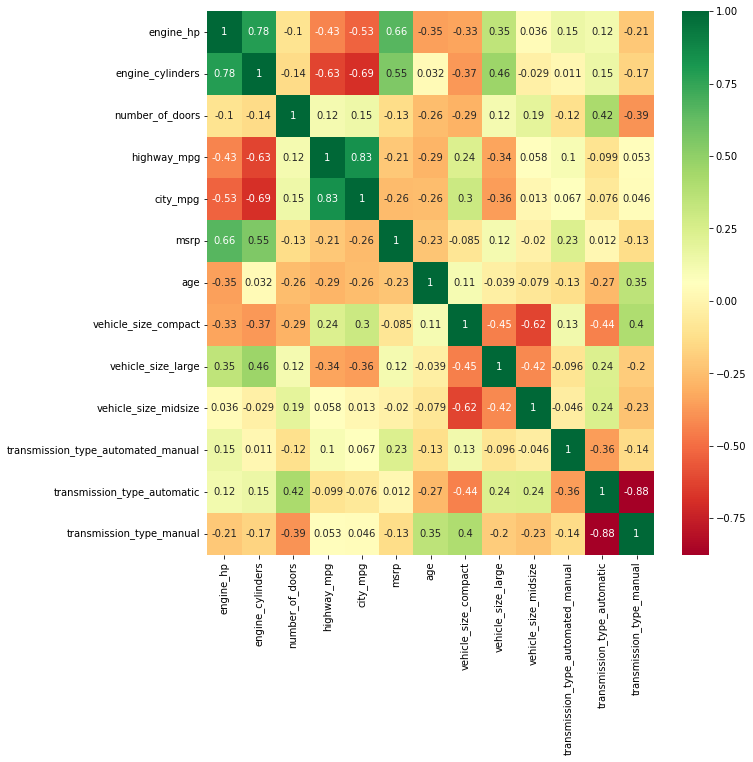

In [130]:
corrmat = df_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(df_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##### Using sklearn train_test_split twice to make 3 sets.

In [131]:
# Creating train,test and validation sets
from sklearn.model_selection import train_test_split
X_T,X_test=train_test_split(df_new,test_size=0.2,random_state=42)
X_train,X_val=train_test_split(X_T,test_size=0.33,random_state=42)
y_train=X_train['msrp']
y_test=X_test['msrp']
y_val=X_val['msrp']

In [132]:
del X_train['msrp']
del X_test['msrp']
del X_val['msrp']

C:\Users\aksha\AppData\Local\Temp/ipykernel_17216/1763639998.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.40476341 0.37632891 0.0108297  0.03612221 0.05712684 0.05408683
 0.01539565 0.00758181 0.00570346 0.01611512 0.00522195 0.01072412]


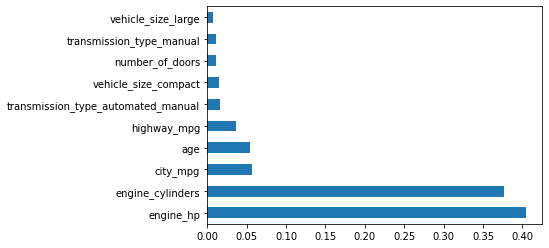

In [133]:
# To determine important features, make use of ExtraTreesRegressor
X=df_new[['engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg',
       'city_mpg', 'age', 'vehicle_size_compact', 'vehicle_size_large',
       'vehicle_size_midsize', 'transmission_type_automated_manual',
       'transmission_type_automatic', 'transmission_type_manual']]
y=df[['msrp']]
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [134]:
# Importing metrics:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

##### Here I will be trying various ML models for regression like:Linear regression, Decision tree regressor etc.

In [140]:
#Linear Regressor
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)

print("Linear Regression Score on Training set is",lin_reg.score(X_train, y_train))#Training Accuracy
print("Linear Regression Score on Test Set is",lin_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lin_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


print('The r2_score is', metrics.r2_score(y_test, y_pred))


Linear Regression Score on Training set is 0.4739194739790439
Linear Regression Score on Test Set is 0.5080234948706
[0.37564258 0.57733697 0.5402547  0.41666437 0.59270397]
Accuracy: 50.05 %
Standard Deviation: 8.79 %
The r2_score is 0.5080234948706


In [139]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print('The r2_score is', metrics.r2_score(y_test, y_pred))


Decision Tree Score on Training set is 0.9766146624766618
Decision Tree Score on Test Set is 0.7983701061161734
[0.81344413 0.92398031 0.88951093 0.83936088 0.96574409]
Accuracy: 88.64 %
Standard Deviation: 5.52 %
The r2_score is 0.7983701061161734


In [142]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=500,min_samples_split=17,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Random Forest Score on Training set is 0.9128851607574209
Random Forest Score on Test Set is 0.8140647095796214
[0.71621164 0.89963433 0.96168277 0.8136981  0.91554343]
Accuracy: 86.14 %
Standard Deviation: 8.70 %
The r2_score is 0.8140647095796214


##### The performance of Random Forest Regressor on test data is much better than Decision Tree.

In [146]:
# Trying XGBoost regressor now
import xgboost as xg
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
  
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)

print('The r2_score is', metrics.r2_score(y_test, pred))

[22:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
The r2_score is 0.4332608313508828


In [147]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [151]:
y_preds=model.predict(X_test)
accuracies = cross_val_score(model, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("XGBoost Forest Score on Training set is",model.score(X_train, y_train))#Training Accuracy
print("XGBoost Score on Test Set is",model.score(X_test, y_test))#Testing Accuracy

[0.76921689 0.93866283 0.90010341 0.85862191 0.95656208]
Accuracy: 88.46 %
XGBoost Forest Score on Training set is 0.9748172223407677
XGBoost Score on Test Set is 0.8186156615237149


In [154]:
# Trying Voting Regressor also
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('DecisionTree', dt_reg), ('RandomForestRegressor', rf_reg)])
vot_reg.fit(X_train, y_train)
y_pred=vot_reg.predict(X_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(X_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Voting Regresssor Score on Training set is 0.960364458594088
Voting Regresssor Score on Test Set is 0.8185312027378342
[0.78022808 0.93450222 0.97419019 0.8420051  0.96023917]
Accuracy: 89.82 %
Standard Deviation: 7.49 %
The r2_score is 0.8185312027378342


##### Voting Regressor is giving best performance so I am dumping it into a pickle file for further sues.

In [155]:
import pickle
pickle.dump(vot_reg, open("vot_reg.pkl", "wb"))
# load model from file
#model = pickle.load(open("vot_reg.pkl", "rb"))